In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(34)

# Cтруктура LSTM

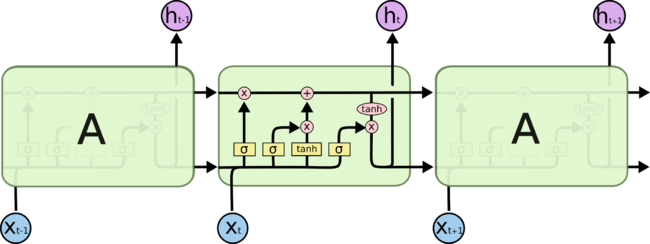

##### Я провів декілька випробувань з RNN, LSTM та GRU, та виявив що саме LSTM дає найкращій результат.

In [10]:
train_data = pd.read_csv("test_task/train.txt", sep= "\s+", header = None)
test_data = pd.read_csv("test_task/test.txt", sep = "\s+", header = None)
final_test = pd.read_csv("test_task/final_test.txt", sep = '\s+', header = None)


In [11]:
pd.set_option('display.max_columns', None)

### Перевіряємо дані

In [12]:
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,13.65,334.51,2323.94,8711.44,1.08,44.40,315.36,2388.05,8053.17,9.2276,0.02,364,2324,100.0,24.44,14.7019
6,1,7,41.9998,0.8400,40.0,445.00,549.57,1354.43,1131.44,3.91,5.71,139.11,2211.82,8316.88,1.02,42.09,130.16,2387.88,8082.01,9.3753,0.02,331,2212,100.0,10.53,6.4254
7,1,8,0.0011,0.0000,100.0,518.67,642.08,1589.55,1407.59,14.62,21.61,553.48,2388.10,9050.35,1.30,47.50,521.74,2388.03,8133.29,8.4339,0.03,391,2388,100.0,38.98,23.2337
8,1,9,0.0011,0.0020,100.0,518.67,642.70,1586.18,1399.01,14.62,21.61,553.90,2388.10,9051.35,1.30,47.30,521.72,2388.08,8132.72,8.3922,0.03,392,2388,100.0,38.99,23.2412
9,1,10,42.0066,0.8400,40.0,445.00,549.83,1353.19,1125.09,3.91,5.71,138.37,2211.84,8320.04,1.02,41.91,130.32,2387.91,8085.94,9.3667,0.02,330,2212,100.0,10.75,6.4268


In [13]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,11.596773,282.469820,2228.406355,8523.545525,1.094971,42.991879,265.943344,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,5.451857,146.539301,145.582047,336.780672,0.127832,3.243475,138.163656,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,5.710000,136.750000,1914.850000,7988.740000,0.930000,36.210000,129.240000,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,5.720000,139.662500,2211.850000,8320.740000,1.020000,41.930000,131.360000,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,9.030000,194.630000,2223.050000,8359.435000,1.020000,42.390000,183.170000,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,15.490000,394.100000,2323.960000,8777.170000,1.260000,45.380000,371.250000,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,21.610000,555.720000,2388.360000,9216.830000,1.300000,48.390000,523.460000,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500


<AxesSubplot:title={'center':'Кількість робочих циклів для кожного двигуна'}>

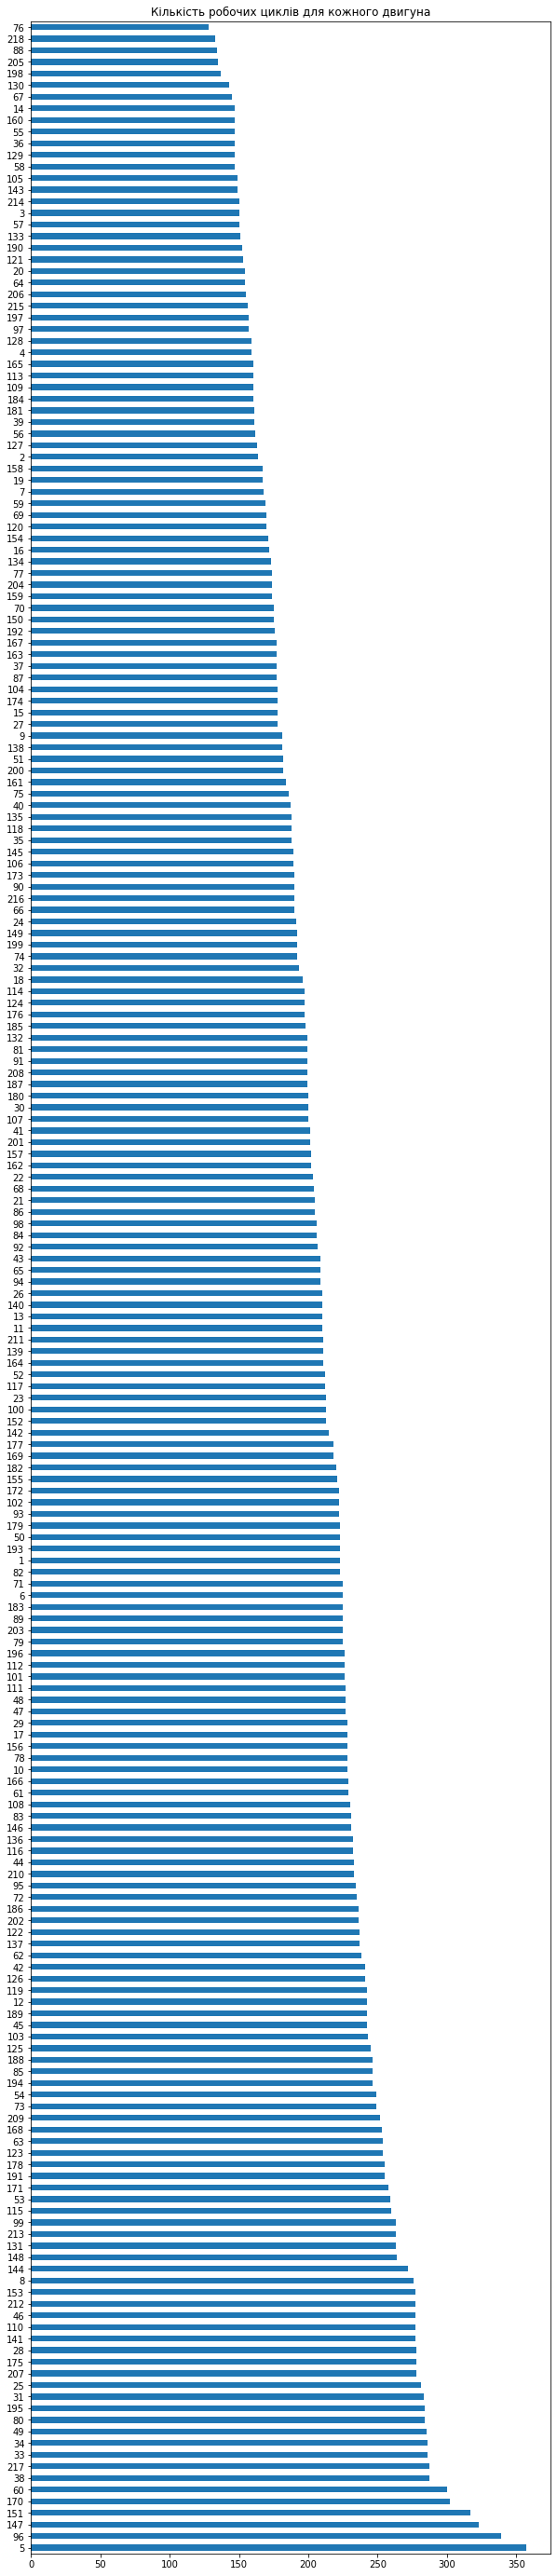

In [14]:
train_data[0].value_counts().plot(kind='barh', figsize=(10,50),title="Кількість робочих циклів для кожного двигуна")


In [15]:

train_data[23].value_counts()

100.00    39037
84.93      6881
Name: 23, dtype: int64

### Викидажмо дані які не будуть використовуватися
Я не використовую дані про налаштування, так як вони не повязані напряму із станом двигуна  

In [16]:
columns_to_be_dropped = [0,1,2,3,4]

train_data_first_column = train_data[0]
test_data_first_column = test_data[0]
final_test_first_column = final_test[0]

train_data=train_data.drop(columns = columns_to_be_dropped)
test_data=test_data.drop(columns = columns_to_be_dropped)
final_test=final_test.drop(columns = columns_to_be_dropped)

 Фунгція process_targets повертає цільове значення RUL для кожног моменту час. Для прикладу візьмемо 1 двигун який виходить з ладу через 223 цикла, тобто для першого циклу значення RUL 223, для другого 222.... 

In [17]:
def process_targets(data_length):

        return np.arange(data_length-1, -1, -1)
    

Функція process_input_data_with_targets розбиває дані на частини 
<div>
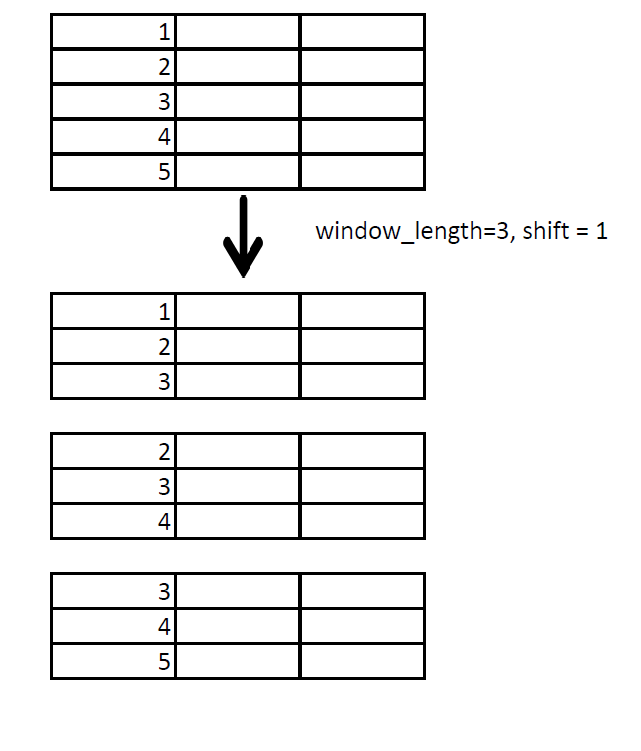
</div>

In [18]:
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):

    num_batches = np.int64(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

Для того щоб дізнатися RUL для кожного двигуна нам достатньо передбачити значення RUL для останьої частини даних
<div>
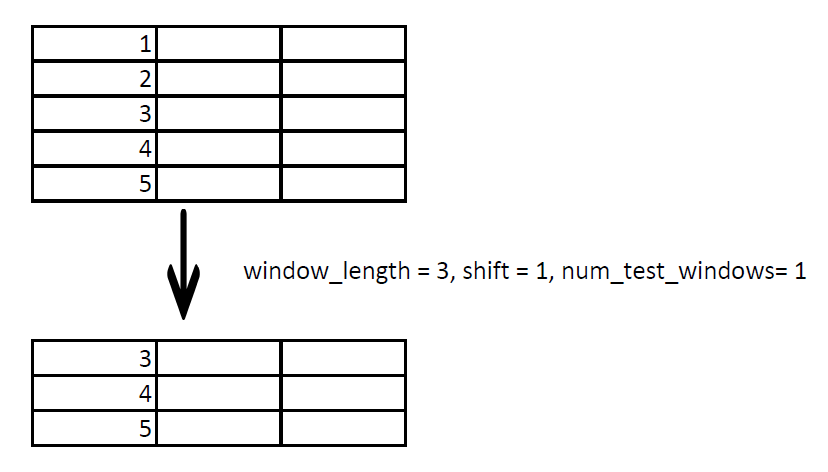
</div>

In [19]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):

    max_num_test_batches = np.int64(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

### Масштабуємо дані

Встановимо розмір вікна 15 та сдвиг 1, також використаємо StandardScaler() для маштабування данних(<i> раніше ми окремо зберігали першу колонку зі значеннями RUL, бо її маштабувати не потрібно </i>)

In [20]:
window_length = 15
shift = 1            
processed_train_data = []
processed_train_targets = []


num_test_windows = 3     
processed_test_data = []
processed_final_test=[]


scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
final_test = scaler.transform(final_test)

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])
final_test =  pd.DataFrame(data = np.c_[final_test_first_column, final_test])

In [21]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,0.611806,0.656133,0.748004,0.872280,0.686535,0.714118,0.767108,0.621400,0.732397,1.290996,0.742459,0.768710,0.420047,0.650649,-0.945475,1.407518,0.707902,0.622252,0.419844,0.787914,0.792209
1,1.0,1.731236,1.672429,1.548675,1.658648,1.816919,1.836683,1.850719,1.096326,1.550624,1.603911,1.325174,1.851930,0.420203,0.792357,-1.252594,1.407518,1.534132,1.095853,0.419844,1.839048,1.833696
2,1.0,-0.885177,-0.646599,-0.487156,-0.695771,-0.703010,-0.659741,-0.597388,-0.038098,-0.533396,-0.586492,-0.330476,-0.598451,0.418646,-0.020113,0.030948,-0.710470,-0.513481,-0.036671,0.419844,-0.600471,-0.607683
3,1.0,0.692683,0.733692,0.644415,0.363956,0.363962,0.376615,0.357247,0.655608,0.587880,-0.117120,0.390980,0.353908,0.419580,-0.155936,-0.145423,-0.710470,0.564210,0.656571,0.419844,0.367864,0.389929
4,1.0,-1.052978,-0.804393,-0.615960,-0.680464,-1.135865,-1.079786,-0.984251,-0.114070,-0.620546,-0.586492,-0.370557,-0.980756,0.418179,0.213283,-0.045001,-0.710470,-0.657173,-0.112172,0.419844,-0.988210,-1.020514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218.0,-1.052978,-0.764276,-0.514441,-0.487155,-1.135865,-1.077951,-0.986093,-0.117298,-0.654277,-0.586492,-0.096157,-0.982421,0.414285,-0.031529,0.179253,-0.710470,-0.549404,-0.112172,0.419844,-1.030619,-1.038017
45914,218.0,-1.052978,-0.789683,-0.511807,-0.530819,-1.135865,-1.079786,-0.988891,-0.117573,-0.655792,-0.586492,-0.114656,-0.982203,0.413429,-0.041181,0.172204,-0.710470,-0.585327,-0.112172,0.419844,-1.047784,-1.042123
45915,218.0,-1.052978,-0.793695,-0.571457,-0.464403,-1.135865,-1.077951,-0.985547,-0.117917,-0.635838,-0.586492,-0.049910,-0.984954,0.413818,-0.033177,0.199870,-0.710470,-0.513481,-0.112172,0.419844,-1.050813,-1.054964
45916,218.0,-0.885177,-0.616378,-0.375382,-0.503382,-0.703010,-0.659741,-0.599708,-0.040296,-0.572710,-0.586492,-0.117739,-0.607354,0.415609,-0.262924,0.118069,-0.710470,-0.405712,-0.036671,0.419844,-0.613598,-0.637875


### Готуємо дані для тренування

In [22]:
num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())
num_final_test_machines = len(final_test[0].unique())

for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values
        
    temp_train_targets = process_targets(data_length = temp_train_data.shape[0])
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets, 
                                                                                window_length = window_length, shift = shift)
    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)


### Готуємо дані для тестування 

In [23]:
def prep_test(num_machines, data):
    processed_data=[]
    count_windows=[]
    for i in np.arange(1, num_machines + 1):
        temp_test_data = data[data[0] == i].drop(columns = [0]).values

        test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length = window_length, shift = shift,
                                                                 num_test_windows = num_test_windows)

        processed_data.append(test_data_for_an_engine)
        count_windows.append(num_windows)
    return processed_data,count_windows


temp_data,num_test_windows_list = prep_test(num_test_machines,test_data)
processed_test_data = np.concatenate(temp_data)

temp_data,num_final_windows_list = prep_test(num_final_test_machines,final_test)
processed_final_test= np.concatenate(temp_data)

### Відбираємо дані для валідації

In [24]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)

### Створення та навчання моделі


In [25]:
def create_compiled_model():
    model = Sequential([
        layers.LSTM(128, input_shape = (window_length, 21), return_sequences=True),
        layers.LSTM(64, return_sequences = True),
        layers.LSTM(32),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = 'adam')
    return model

In [26]:
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 50,
                    validation_data = (processed_val_data, processed_val_targets),
                    batch_size = 128)

Epoch 1/50
268/268 [==============================] - 6s 13ms/step - loss: 5608.6255 - val_loss: 4228.3193
Epoch 2/50
268/268 [==============================] - 3s 11ms/step - loss: 4205.9521 - val_loss: 4234.9253
Epoch 3/50
268/268 [==============================] - 3s 11ms/step - loss: 4208.9800 - val_loss: 4237.1499
Epoch 4/50
268/268 [==============================] - 3s 11ms/step - loss: 4208.8486 - val_loss: 4225.6650
Epoch 5/50
268/268 [==============================] - 3s 11ms/step - loss: 4209.1191 - val_loss: 4226.4492
Epoch 6/50
268/268 [==============================] - 3s 11ms/step - loss: 4216.6348 - val_loss: 4226.3394
Epoch 7/50
268/268 [==============================] - 3s 11ms/step - loss: 3006.5154 - val_loss: 1697.5973
Epoch 8/50
268/268 [==============================] - 3s 12ms/step - loss: 1626.5105 - val_loss: 1613.6057
Epoch 9/50
268/268 [==============================] - 3s 12ms/step - loss: 1502.7429 - val_loss: 1462.7891
Epoch 10/50
268/268 [================

### Порівняння втрат

<AxesSubplot:>

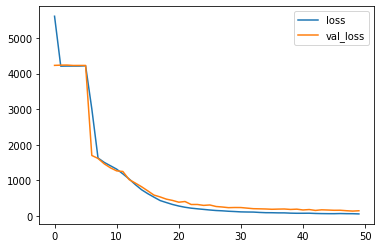

In [27]:
hist_df = pd.DataFrame(data = np.array([history.history['loss'],history.history['val_loss']]).T, 
                       columns = ['loss', 'val_loss'])
hist_df.plot()

### Передбачення значення RUL для кожного двигуна в test.txt

<AxesSubplot:title={'center':'Кількість робочих циклів для кожного двигуна'}>

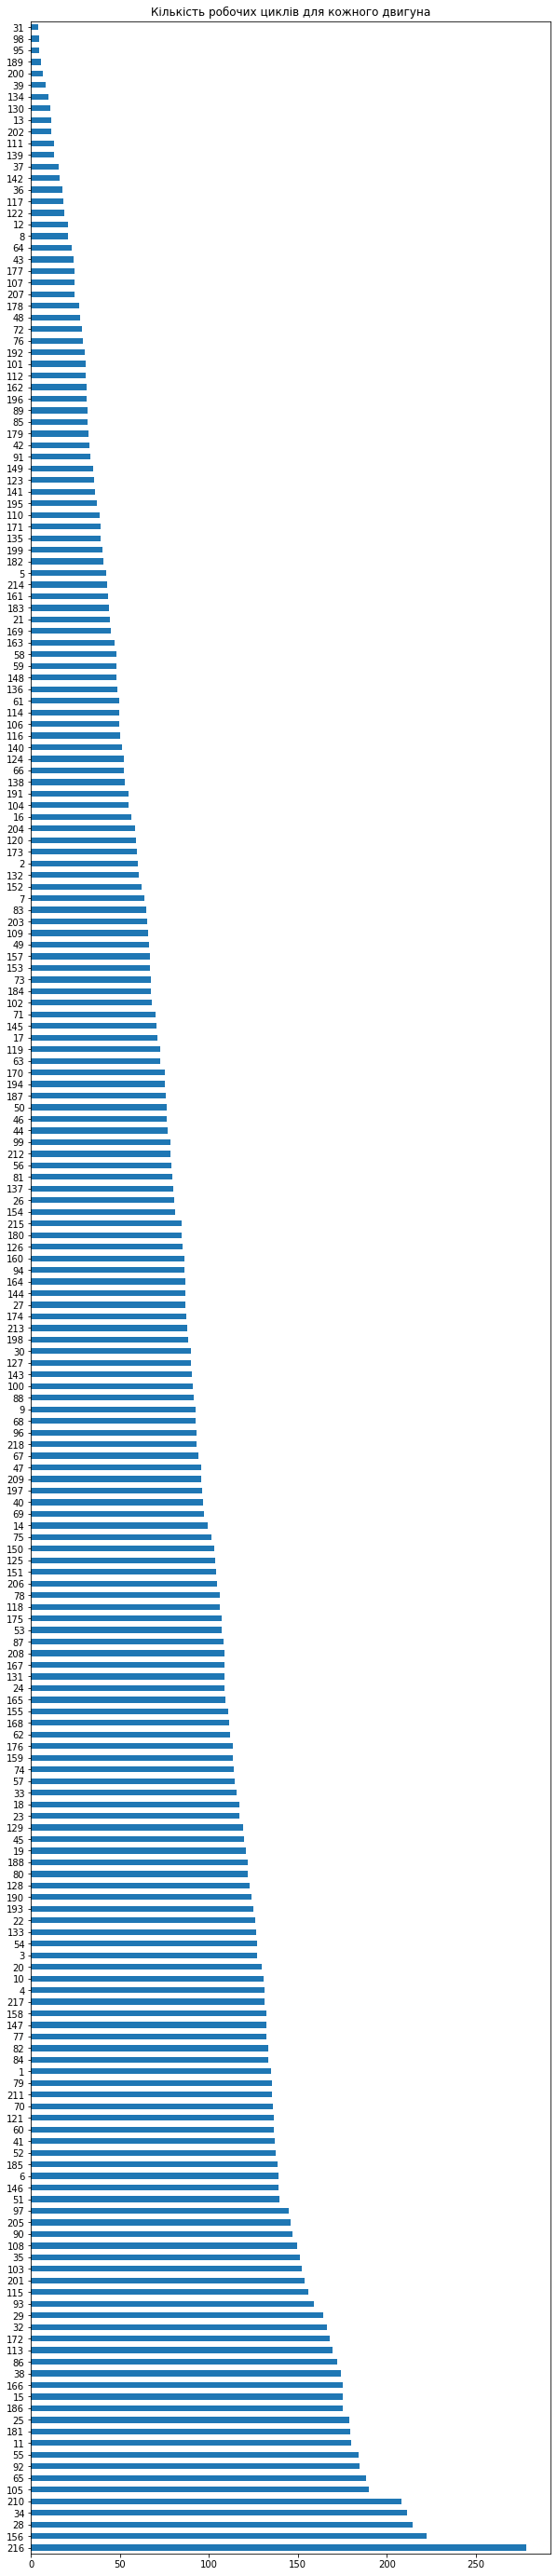

In [28]:
pred_test = model.predict(processed_test_data)

preds_for_each_engine = np.split(pred_test, np.cumsum(num_test_windows_list)[:-1])
indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]
result=pd.DataFrame(preds_for_last_example).sort_values(by=0, ascending=False)
result.index += 1
result[0].plot(kind='barh', figsize=(10,50),title="Кількість робочих циклів для кожного двигуна")

### Передбачення значення RUL для кожного двигуна в final_test.txt

<AxesSubplot:title={'center':'Кількість робочих циклів для кожного двигуна'}>

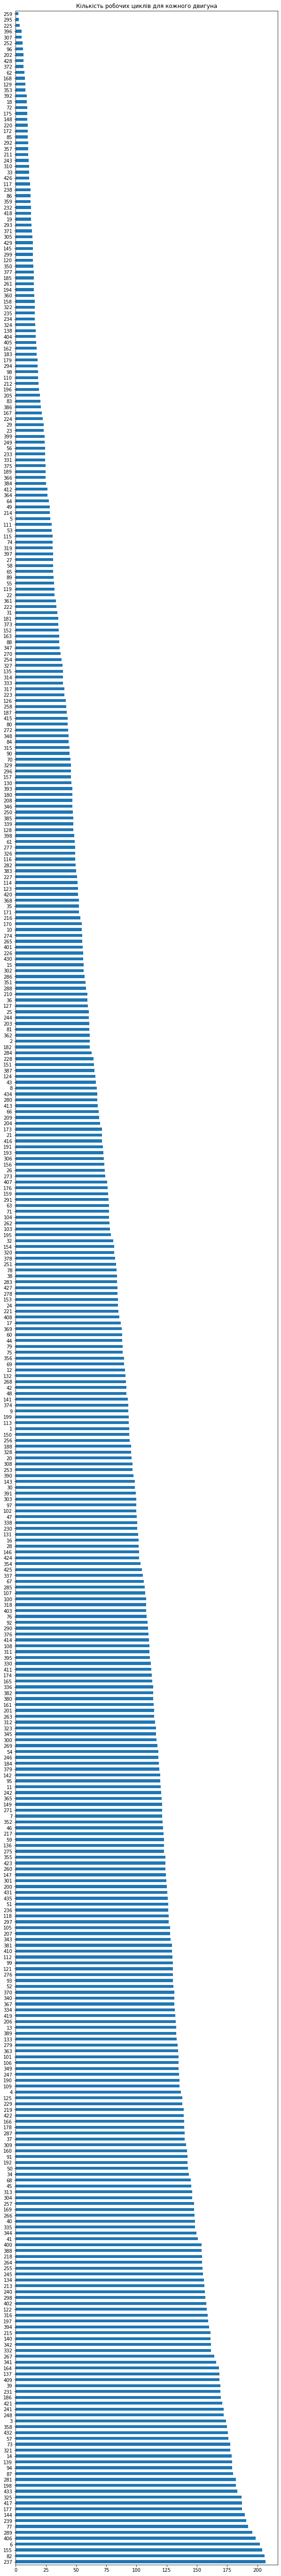

In [29]:
pred_final_test=model.predict(processed_final_test)
preds_for_each_engine = np.split(pred_final_test, np.cumsum(num_final_windows_list)[:-1])
indices_of_last_examples = np.cumsum(num_final_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]
result=pd.DataFrame(preds_for_last_example).sort_values(by=0, ascending=False)
result.index += 1
result[0].plot(kind='barh', figsize=(10,100),title="Кількість робочих циклів для кожного двигуна")


### Збереження моделі

In [ ]:
tf.keras.models.save_model(model, "LSTM_model_1")